Row
    [0] Column(background='WhiteSmoke', width=200)
        [0] Column
            [0] PNG(str, height=50)
        [1] Column
            [0] Markdown(str)
            [1] Select(options=['sn', 'sn-ko', ...], value='sn', width=150)
        [2] Column
            [0] Markdown(str)
            [1] RadioBoxGroup(options=['Série temporelle', ...], value='Série temporelle')
        [3] Markdown(str)
        [4] Column
            [0] Markdown(str)
            [1] Checkbox()
        [5] Spacer(background='WhiteSmoke', sizing_mode='stretch_both')
    [1] Column(width=500)
        [0] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Select(options=['Précipitation', ...], value='Précipitation', width=700)
                [1] Column
                    [0] Markdown(str)
                    [1] Select(options=['Tous', 'RCP 4.5', ...], value='Tous', width=700)
                [2] Column
                    [0] Markdown(str)
                    [1] Select(options=['Toutes', 'CCLM4_CNRM-CER...], value='Toutes', width=700)
                [3] Markdown(str)
                [4] HoloViews(Overlay)
                [5] HoloViews(Overlay)
                [6] Markdown(str)
                [7] Row
                    [0] Markdown(str)
                    [1] Markdown(str)
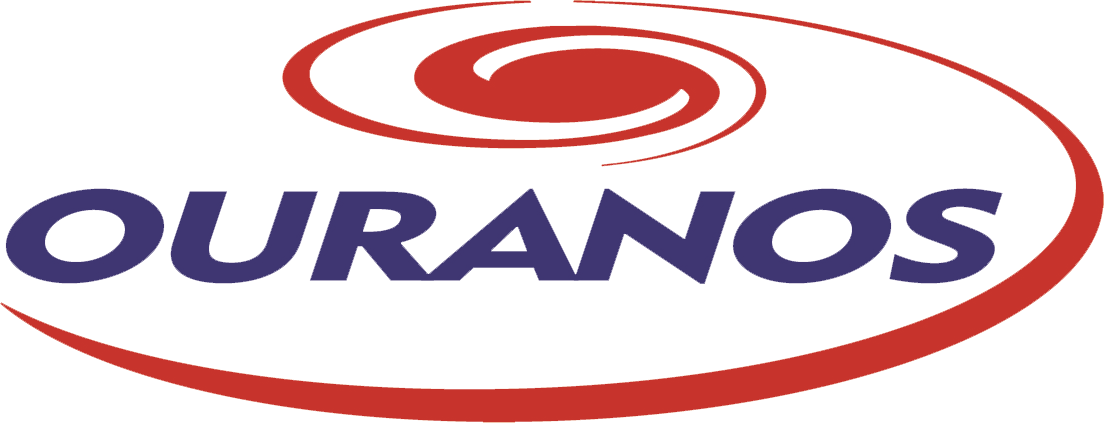

In [2]:
# -*- coding: utf-8 -*-
# ----------------------------------------------------------------------------------------------------------------------
# Climate information dashboard.
#
# Jupyter-notebook entry point.
#
# Contributors:
# 1. rousseau.yannick@ouranos.ca
# (C) 2021-2022 Ouranos Inc., Canada
# ----------------------------------------------------------------------------------------------------------------------

# External libraries.
import panel as pn
import panel.widgets as pnw
import pandas as pd
import warnings
from typing import List

# Dashboard libraries.
import dash_plot
import dash_utils as du
import def_lib
import def_rcp
import def_sim
import def_view
from def_constant import const as c
from def_context import cntx
from def_delta import Delta, Deltas
from def_hor import Hor, Hors
from def_lib import Lib, Libs
from def_project import Project, Projects
from def_rcp import RCP, RCPs
from def_sim import Sim, Sims
from def_stat import Stat, Stats
from def_varidx import VarIdx, VarIdxs
from def_view import View, Views

warnings.filterwarnings("ignore")

dash, sidebar, project_f, view_f, lib_f, delta_f, varidx_f, hor_f, rcp_f, sim_f, stat_f, tab_ts, tab_tbl, tab_map,\
    tab_cycle = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
event_cascade = "event_cascade"


def f_code(
    f_name: str
) -> str:

    """
    --------------------------------------------------------------------------------------------------------------------
    Get field code from its description.

    Parameters
    ----------
    f_name : str
        Field name.

    Returns
    -------
    str
        Field code.
    --------------------------------------------------------------------------------------------------------------------
    """

    code = ""

    if f_name == "project":
        code = project_f[1].value if len(project_f) > 0 else ""
    elif f_name == "view":
        code = cntx.views.code_from_desc(view_f[1].value) if len(view_f) > 0 else ""
    elif f_name == "lib":
        code = cntx.libs.code_from_desc(lib_f[1].value) if len(lib_f) > 0 else ""
    elif f_name == "delta":
        code = str(delta_f[1].value) if len(delta_f) > 0 else "False"
    elif f_name == "varidx":
        code = cntx.varidxs.code_from_desc(varidx_f[1].value) if len(varidx_f) > 0 else ""
    elif f_name == "hor":
        code = cntx.hors.code_from_desc(hor_f[1].value) if len(hor_f) > 0 else ""
    elif f_name == "rcp":
        code = cntx.rcps.code_from_desc(rcp_f[1].value) if len(rcp_f) > 0 else ""
    elif f_name == "stat":
        code = cntx.stats.code_from_desc(stat_f[1].value) if len(stat_f) > 0 else ""
    elif f_name == "sim":
        code = cntx.sims.code_from_desc(sim_f[1].value) if len(sim_f) > 0 else ""

    return code


def update_f(
    f_name: str,
    option_l: List[str] = []
):
    
    """
    --------------------------------------------------------------------------------------------------------------------
    Update a field.
    
    This is called to initalize and update GUI components.
    Each field corresponds to a group of two features : a label and a GUI component displaying options. This explains
    why the options are stored into the 2nd sub-component. 
    
    Parameters
    ----------
    field : str
        Name of field to update.
    option_l : List[str]
        List of items to add as options.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    global project_f, view_f, lib_f, delta_f, varidx_f, hor_f, rcp_f, sim_f, stat_f
    
    option_l_updated = False
    
    if f_name == "project":
        if len(project_f) == 0:
            project_f = pn.Column(pn.pane.Markdown("<b>Choisir le projet</b>"),
                                  pnw.Select(options=option_l, width=150))
            project_f[1].param.watch(project_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = project_f[1].value not in option_l
            project_f[1].options = option_l
        if option_l_updated:
            project_f[1].value = project_f[1].options[0]
        cntx.project = Project(str(f_code("project")))
            
    elif f_name == "view":
        if len(view_f) == 0:
            view_f = pn.Column(pn.pane.Markdown("<b>Choisir la vue</b>"),
                               pnw.RadioBoxGroup(name="RadioBoxGroup", options=option_l, inline=False))
            view_f[1].param.watch(view_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = view_f[1].value not in option_l
            view_f[1].options = option_l
        if option_l_updated:
            view_f[1].value = view_f[1].options[0]
        cntx.view = View(str(f_code("view")))
    
    elif f_name == "lib":
        if len(lib_f) == 0:
            lib_f = pn.Column(pn.pane.Markdown("<b>Choisir la librairie graphique</b>"),
                              pnw.RadioBoxGroup(name="RadioBoxGroup", options=option_l, inline=False))
            lib_f[1].param.watch(lib_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = lib_f[1].value not in option_l
            lib_f[1].options = option_l
        if option_l_updated: 
            lib_f[1].value = lib_f[1].options[0]
        cntx.lib = Lib(str(f_code("lib")))
            
    elif f_name == "delta":
        if len(delta_f) == 0:
            delta_f = pn.Column(pn.pane.Markdown("<b>Afficher les anomalies</b>"),
                                pnw.Checkbox(value=False))
            delta_f[1].param.watch(delta_updated, ["value"], onlychanged=True)
        cntx.delta = Delta(str(f_code("delta")))
            
    elif f_name == "varidx":
        if len(varidx_f) == 0:
            varidx_f = pn.Column(pn.pane.Markdown("<b>Variable or index</b>"),
                                 pnw.Select(options=option_l, width=700))
            varidx_f[1].param.watch(varidx_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = varidx_f[1].value not in option_l
            varidx_f[1].options = option_l
        if option_l_updated: 
            varidx_f[1].value = varidx_f[1].options[0]
        cntx.varidx = VarIdx(str(f_code("varidx")))
            
    elif f_name == "hor":
        if len(hor_f) == 0:
            hor_f = pn.Column(pn.pane.Markdown("<b>Horizon</b>"),
                              pnw.Select(options=option_l, width=700))
            hor_f[1].param.watch(hor_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = hor_f[1].value not in option_l
            hor_f[1].options = option_l
        if option_l_updated:
            hor_f[1].value = hor_f[1].options[0]
        cntx.hor = Hor(str(f_code("hor")))
            
    elif f_name == "rcp":
        if len(rcp_f) == 0:
            rcp_f = pn.Column(pn.pane.Markdown("<b>Scénario d'émission</b>"),
                              pnw.Select(options=option_l, width=700))
            rcp_f[1].param.watch(rcp_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = rcp_f[1].value not in option_l
            rcp_f[1].options = option_l
        if option_l_updated:
            rcp_f[1].value = rcp_f[1].options[0]
        cntx.rcp = RCP(str(f_code("rcp")))
            
    elif f_name == "stat":
        if len(stat_f) == 0:
            stat_f = pn.Column(pn.pane.Markdown("<b>Statistique</b>"),
                               pnw.Select(options=option_l, width=700))
            stat_f[1].param.watch(stat_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = stat_f[1].value not in option_l
            stat_f[1].options = option_l
        if option_l_updated:
            stat_f[1].value = stat_f[1].options[0]
        cntx.stat = Stat(str(f_code("stat")))
            
    elif f_name == "sim":
        if len(sim_f) == 0:
            sim_f = pn.Column(pn.pane.Markdown("<b>Simulation</b>"),
                              pnw.Select(options=option_l, width=700))
            sim_f[1].param.watch(sim_updated, ["value"], onlychanged=True)
        else:
            option_l_updated = sim_f[1].value not in option_l
            sim_f[1].options = option_l
        if option_l_updated:
            sim_f[1].value = sim_f[1].options[0]
        cntx.sim = Sim(str(f_code("sim")))


def update_sidebar():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update sidebar.
    --------------------------------------------------------------------------------------------------------------------
    """

    global sidebar

    show_delta_f = cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_tbl, c.view_map]
    sidebar = pn.Column(pn.Column(pn.pane.PNG(cntx.p_logo, height=50)),
                        project_f,
                        view_f,
                        lib_f if cntx.opt_lib else None,
                        delta_f if show_delta_f else "",
                        pn.Spacer(background=cntx.col_sb_fill, sizing_mode="stretch_both"),
                        background=cntx.col_sb_fill,
                        width=200)

    
def update_tab(
    tab_name: str
):

    """
    --------------------------------------------------------------------------------------------------------------------
    Update dashboard.

    Parameters
    ----------
    tab_name: str
        Tab name.
    --------------------------------------------------------------------------------------------------------------------
    """

    global tab_ts, tab_tbl, tab_map, tab_cycle

    # Reference value.
    ref_val = pn.Row("\n\nValeur moyenne pour la période de référence : ", du.ref_val())

    # Note related to time series.
    if cntx.view.code == c.view_ts:
        if cntx.delta.code == "False":
            ts_note = "Valeurs ajustées (après ajustement de biais)"
        else:
            ts_note = "Différence entre les valeurs observées et les valeurs ajustées"
    else:
        if cntx.delta.code == "False":
            ts_note = "Valeurs non ajustées (avant ajustement de biais)"
        else:
            ts_note = "Différence entre les valeurs non ajustées et les valeurs ajustées"

    if tab_name in "ts":
        df_rcp = pd.DataFrame(du.load_data(dash_plot.mode_rcp))
        df_sim = pd.DataFrame(du.load_data(dash_plot.mode_sim))
        space = pn.pane.Markdown("<br><br><br>" if cntx.lib.code == c.lib_alt else "")
        ts_rcp = dash_plot.gen_ts(df_rcp, dash_plot.mode_rcp)
        ts_sim = dash_plot.gen_ts(df_sim, dash_plot.mode_sim)
        if len(tab_ts) == 0:
            tab_ts = pn.Row(pn.Column(varidx_f,
                                      rcp_f,
                                      sim_f,
                                      ts_note,
                                      ts_rcp,
                                      ts_sim,
                                      space,
                                      ref_val))
        else:
            tab_ts[0][4] = ts_rcp
            tab_ts[0][5] = ts_sim

    elif tab_name == "tbl":
        tbl = dash_plot.gen_tbl()
        if len(tab_tbl) == 0:
            tab_tbl = pn.Row(pn.Column(varidx_f,
                                       hor_f,
                                       pn.Column(tbl, width=700),
                                       ref_val))
        else:
            tab_tbl[0][2][0] = tbl

    elif tab_name == "map":
        show_rcp_f = cntx.hor.code != cntx.per_ref_str
        show_stat_f = cntx.hor.code != cntx.per_ref_str
        df = pd.DataFrame(du.load_data())
        z_range = du.calc_range()
        map = dash_plot.gen_map(df, z_range)
        if len(tab_map) == 0:
            tab_map = pn.Row(pn.Column(varidx_f,
                                       hor_f,
                                       rcp_f if show_rcp_f else "",
                                       stat_f if show_stat_f else "",
                                       map))
        else:
            tab_map[0][2] = rcp_f if show_rcp_f else ""
            tab_map[0][3] = stat_f if show_stat_f else ""
            tab_map[0][4] = map

    elif tab_name == "cycle":
        show_rcp_f = cntx.hor.code != cntx.per_ref_str
        show_sim_f = cntx.hor.code != cntx.per_ref_str
        df_ms = pd.DataFrame(du.load_data("MS"))
        df_d = pd.DataFrame(du.load_data("D"))
        cycle_ms = dash_plot.gen_cycle_ms(df_ms)
        cycle_d = dash_plot.gen_cycle_d(df_d)
        if len(tab_cycle) == 0:
            tab_cycle = pn.Row(pn.Column(varidx_f,
                                         hor_f,
                                         rcp_f if show_rcp_f else "",
                                         sim_f if show_sim_f else "",
                                         cycle_ms,
                                         cycle_d))
        else:
            tab_cycle[0][2] = rcp_f if show_rcp_f else ""
            tab_cycle[0][3] = sim_f if show_sim_f else ""
            tab_cycle[0][4] = cycle_ms
            tab_cycle[0][5] = cycle_d

        
def update_dash():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update dashboard.
    --------------------------------------------------------------------------------------------------------------------
    """

    global dash

    # Initialize sidebar and dashboard.
    if len(dash) == 0:
        update_sidebar()
        dash = pn.Row(sidebar, pn.Column("content", width=500))

    # Update sidebar.
    if cntx.opt_lib:
        dash[0][3] = lib_f
    else:
        dash[0][3] = ""
    if cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_tbl, c.view_map]:
        dash[0][4] = delta_f
    else:
        dash[0][4] = ""

    # Update content.
    # An error occurs if some information is missing; this is expected when launching the application.
    try:
        update_tab(cntx.view.code.replace("_bias", ""))
        if cntx.view.code in [c.view_ts, c.view_ts_bias]:
            dash[1][0] = tab_ts
        elif cntx.view.code == c.view_tbl:
            dash[1][0] = tab_tbl
        elif cntx.view.code == c.view_map:
            dash[1][0] = tab_map
        elif cntx.view.code == c.view_cycle:
            dash[1][0] = tab_cycle
    except Exception as e:
        pass


def update_project():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update project.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.projects = Projects("*")
    update_f("project", cntx.projects.desc_l)

    
def update_view():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update view.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.views = Views("*")
    update_f("view", cntx.views.desc_l)
    

def update_lib():

    """
    --------------------------------------------------------------------------------------------------------------------
    Initialize library.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.libs = Libs("*")
    update_f("lib", cntx.libs.desc_l)
    

def update_delta():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update delta.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    update_f("delta", cntx.deltas.desc_l)
    
    
def update_varidx():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update variable or index.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.varidxs = VarIdxs("*")
    update_f("varidx", cntx.varidxs.desc_l)

    
def update_hor():
    
    """
    --------------------------------------------------------------------------------------------------------------------
    Update horizon.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    if cntx.view.code in [c.view_tbl, c.view_map, c.view_cycle]:
        cntx.hors = Hors("*")
        update_f("hor", cntx.hors.desc_l)


def update_rcp():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update emission scenario.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.rcps = RCPs("*")
    rcp_l = cntx.rcps.desc_l
    if cntx.view.code in [c.view_ts, c.view_ts_bias]:
        rcp_l = [dict(def_rcp.code_props())[c.rcpxx][0]] + rcp_l
    if cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_map, c.view_cycle]:
        update_f("rcp", rcp_l)
        

def update_stat():

    """
    --------------------------------------------------------------------------------------------------------------------
    Update statistic.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    if cntx.view.code == c.view_map:
        cntx.stats = Stats("*")
        update_f("stat", cntx.stats.desc_l)
        

def update_sim():
    
    """
    --------------------------------------------------------------------------------------------------------------------
    Update simulation.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    if cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_cycle]:
        cntx.sims = Sims("*")
        sim_l = cntx.sims.desc_l
        if cntx.view.code in [c.view_ts, c.view_ts_bias]:
            sim_l = [dict(def_sim.code_desc())[c.simxx]] + sim_l
        update_f("sim", sim_l)
    if f_code("sim") != "":
        if dict(def_sim.code_desc())[c.simxx] == f_code("sim"):
            sim_code = c.simxx
        else:
            sim_code = f_code("sim")
        cntx.sim = Sim(sim_code)


def project_updated(event=None):

    """
    --------------------------------------------------------------------------------------------------------------------
    Event: project updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.project = Project(str(f_code("project")))
    cntx.load()
    
    update_view()
    view_updated(event_cascade)


def view_updated(event=None):

    """
    --------------------------------------------------------------------------------------------------------------------
    Event: view updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.view = View(str(f_code("view")))
    
    update_lib()
    lib_updated(event_cascade)
    if cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_tbl, c.view_map]:
        delta_updated(event_cascade)
    elif cntx.view.code in [c.view_cycle]:
        update_varidx()
        varidx_updated(event_cascade)
    
    
def lib_updated(event=None):

    """
    --------------------------------------------------------------------------------------------------------------------
    Event: library updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.lib = Lib(str(f_code("lib")))

    if event != event_cascade:
        update_dash()
        

def delta_updated(event=None):
    
    """
    --------------------------------------------------------------------------------------------------------------------
    Event: delta updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.delta = Delta(str(f_code("delta")))
    
    if cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_tbl, c.view_map]:
        update_varidx()
        varidx_updated(event_cascade)
        
    if event != event_cascade:
        update_dash()
        
        
def varidx_updated(event=None):

    """
    --------------------------------------------------------------------------------------------------------------------
    Event: variable or index updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.varidx = VarIdx(str(f_code("varidx")))
    cntx.project.load_quantiles()
    
    if cntx.view.code in [c.view_tbl, c.view_map, c.view_cycle]:
        update_hor()
        hor_updated(event_cascade)
    elif cntx.view.code in [c.view_ts, c.view_ts_bias]:
        update_rcp()
        rcp_updated(event_cascade)


def hor_updated(event=None):
    
    """
    --------------------------------------------------------------------------------------------------------------------
    Event: horizon updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.hor = Hor(str(f_code("hor")))
    
    if cntx.view.code in [c.view_tbl, c.view_map, c.view_cycle]:
        if cntx.view.code in [c.view_map, c.view_cycle]:
            update_dash()
        update_rcp()
        rcp_updated(event_cascade)
        if cntx.view.code == c.view_tbl:
            update_dash()
    
    
def rcp_updated(event=None):

    """
    --------------------------------------------------------------------------------------------------------------------
    Event: emission scenario updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    if dict(def_rcp.code_props())[c.rcpxx][0] == f_code("rcp"):
        rcp_code = c.rcpxx
    else:
        rcp_code = f_code("rcp")
    cntx.rcp = RCP(rcp_code)
        
    if cntx.view.code in [c.view_map]:
        update_stat()
        stat_updated(event_cascade)
    elif cntx.view.code in [c.view_ts, c.view_ts_bias, c.view_cycle]:
        update_sim()
        sim_updated(event_cascade)


def stat_updated(event=None):

    """
    --------------------------------------------------------------------------------------------------------------------
    Event: statistoc updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.stat = Stat(str(f_code("stat")))
    
    update_dash()


def sim_updated(event=None):
    
    """
    --------------------------------------------------------------------------------------------------------------------
    Event: simulation updated.
    --------------------------------------------------------------------------------------------------------------------
    """
    
    cntx.sim = Sim(str(f_code("sim")))

    update_dash()
    

def main():
    
    # Initialize context.
    cntx.code    = c.platform_jupyter
    cntx.views   = Views()
    cntx.libs    = Libs()
    cntx.deltas  = Deltas(["False", "True"])
    cntx.delta   = Delta("False")
    cntx.varidxs = VarIdxs()
    cntx.hors    = Hors()
    cntx.rcps    = RCPs()

    # Initialize GUI.
    update_project()
    project_updated(event_cascade)
    update_delta()
    update_dash()
    display(dash)

    
main()